### Pandas Expanding and Rolling

- Expanding 
  - 요약 기능을 허용하는 확장 개체를 누적 적용하여 반환~ 확장된 변형 제공
  - 누적된 변경된 값의 정보


- Rolling
  - 요약 기능을 허용하는 Rolling 객체를 길이 n개의 창에 적용하여 반환
  - 이동평균(Moving Average)을 구할 때 사용

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

<AxesSubplot:>

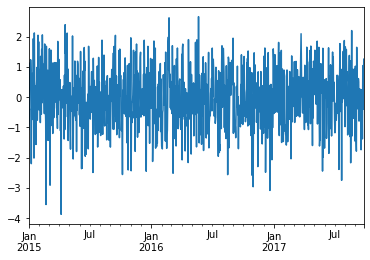

In [2]:
s = pd.Series(np.random.randn(1000),
             index=pd.date_range('1/1/2015', periods=1000))

s
s.plot()

<AxesSubplot:>

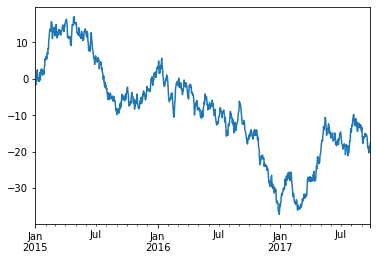

In [3]:
s = s.cumsum()  # 누적 합
s.plot()

In [7]:
# rolling: 이동평균 구할 때 사용
r = s.rolling(window=30)

r

#window: size of moving window

Rolling [window=30,center=False,axis=0,method=single]

In [8]:
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22   -15.547919
2017-09-23   -15.792350
2017-09-24   -15.978517
2017-09-25   -16.173475
2017-09-26   -16.314641
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

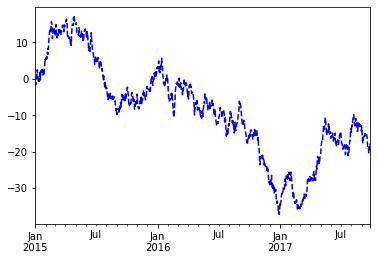

In [9]:
# 이동평균
s.plot(style='b--')

<AxesSubplot:>

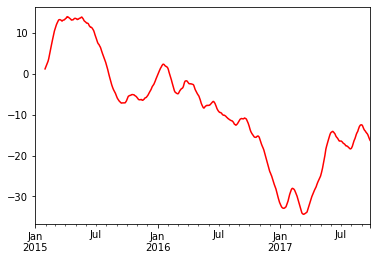

In [10]:
# 이동평균
r.mean().plot(style='r')

<AxesSubplot:>

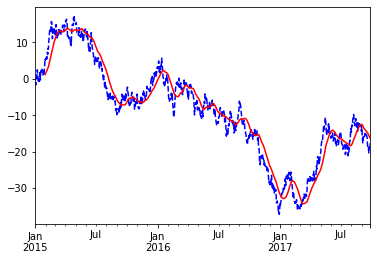

In [11]:
# 이동평균

s.plot(style='b--')
r.mean().plot(style='r')

<AxesSubplot:>

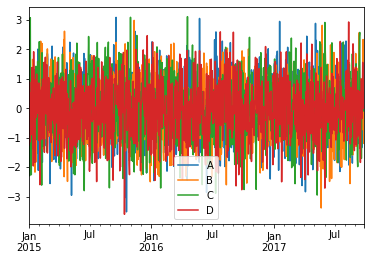

In [15]:
# expanding
df = pd.DataFrame(np.random.randn(1000,4),
                 index=pd.date_range('1/1/2015', periods=1000),
                 columns=['A','B','C','D'])
df.plot()

In [17]:
df = df.cumsum()

df

,A,B,C,D
2015-01-01,-0.384746,0.520500,0.023849,0.762841
2015-01-02,0.173034,2.118376,0.572508,-0.491971
2015-01-03,-0.959223,2.316864,-1.723493,0.391124
2015-01-04,-1.758961,4.130158,-0.013902,-0.758606
2015-01-05,-1.855443,4.831305,3.051365,-1.195723
...,...,...,...,...
2017-09-22,6.171972,-18.992149,40.824037,-66.840686
2017-09-23,5.971215,-18.982020,41.225521,-65.292380
2017-09-24,7.059959,-16.656632,41.121571,-64.818201
2017-09-25,6.325510,-15.592917,41.141246,-64.305487


<AxesSubplot:>

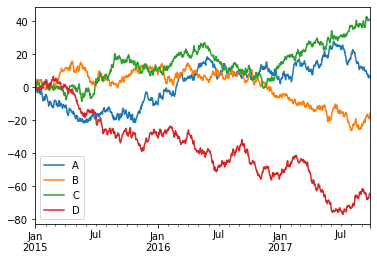

In [18]:
df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

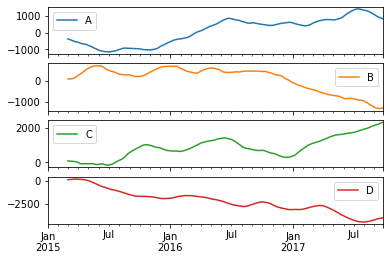

In [20]:
df.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

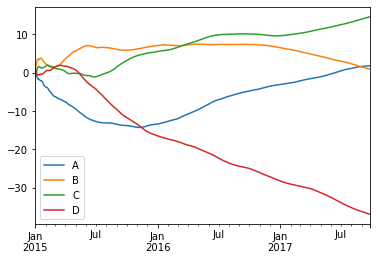

In [21]:
df.rolling(window=len(df), min_periods=1).mean().plot()
# min_periods: int, default:1
# Minimum number of observation in window required to have a value

In [22]:
# df.expanding
# Provides expanding transformation (확장된 변형 제공)
# 누적된 변경된 값의 정보 제공

In [24]:
df.expanding(min_periods=1).mean()

,A,B,C,D
2015-01-01,-0.384746,0.520500,0.023849,0.762841
2015-01-02,-0.105856,1.319438,0.298179,0.135435
2015-01-03,-0.390312,1.651913,-0.375712,0.220665
2015-01-04,-0.732474,2.271474,-0.285260,-0.024153
2015-01-05,-0.957068,2.783441,0.382065,-0.258467
...,...,...,...,...
2017-09-22,1.806142,1.059590,14.529935,-36.806738
2017-09-23,1.810319,1.039489,14.556711,-36.835309
2017-09-24,1.815579,1.021757,14.583329,-36.863348
2017-09-25,1.820094,1.005126,14.609913,-36.890818


<AxesSubplot:>

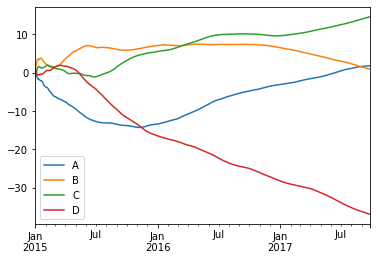

In [25]:
df.expanding(min_periods=1).mean().plot()

In [26]:
dfe = pd.DataFrame({'B':[0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

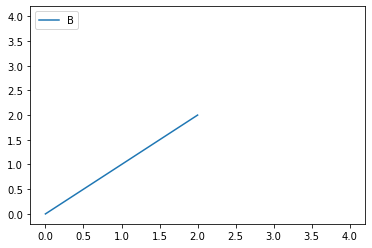

In [27]:
dfe.plot()

In [28]:
dfe.expanding(2).sum()  # 누적합

,B
0,NaN
1,1.0
2,3.0
3,3.0
4,7.0


<AxesSubplot:>

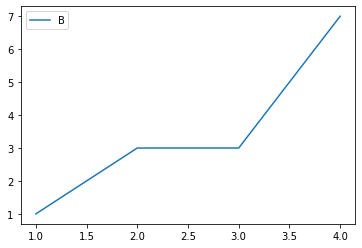

In [30]:
dfe.expanding(2).sum().plot()

In [32]:
dfe.expanding(2).mean()

,B
0,NaN
1,0.50
2,1.00
3,1.00
4,1.75


<AxesSubplot:>

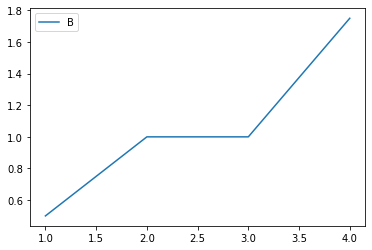

In [31]:
dfe.expanding(2).mean().plot()